Colab Environment Setting

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from glob import glob, iglob

In [15]:
# Training Dataset Setting
train_img_path = '/content/drive/MyDrive/Colab Notebooks/aiffel_lms/lms_rock'

train_img_path_r = glob(train_img_path + '/rock/*.jpg')
train_img_path_p = glob(train_img_path + '/paper/*.jpg')
train_img_path_s = glob(train_img_path + '/scissor/*.jpg')


In [18]:
# Image Size Check

for i in range(len(train_img_path_r)):
    if Image.open(train_img_path_r[i]).size != (28, 28):
        print('there is non 28 * 28 image')
    else:
      break
print('Every image is 28 * 28')


Every image is 28 * 28


In [19]:
# Image Size Check Function

def size_check(img_path):
  for i in range(len(img_path)):
    if Image.open(img_path[i]).size != (28, 28):
      print('there is non 28 * 28 image')
    else:
      break
  print('Every image is 28 * 28')

In [20]:
# Img Size check
size_check(train_img_path_r)
size_check(train_img_path_s)
size_check(train_img_path_p)

Every image is 28 * 28
Every image is 28 * 28
Every image is 28 * 28


>> Checked out every image size

In [22]:
# Image Resizing. 
# Actually don't need this time every image is 28 * 28 size


def resize_images(img_path):
    images = img_path
    print(len(images), 'images to be resized')

    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, 'jpeg')

    print(len(images), 'image resized')


In [23]:
# Image Quantity Check

def count_image(img_path):
  images = img_path
  print(len(images), 'images are counted')

In [24]:
count_image(train_img_path_r)
count_image(train_img_path_p)
count_image(train_img_path_s)

1206 images are counted
1326 images are counted
993 images are counted


In [25]:
print(1206 + 1326 + 993)

3525


In [26]:
#For resize_images function Testing
resize_images(train_img_path_r)

1206 images to be resized
1206 image resized


>> Training Image
*   Rock images 1206
*   Paper images 1326
*   Scissor images 993




Bring Data as numpy

In [27]:

def load_data(img_path, number_of_data):  # 가위바위보 이미지 개수 총합 디폴트로 세팅하지 않음
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size = 28
    color = 3
    # 이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size,
                                                                                          img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx = 0
    for file in iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0  # 가위 : 0
        idx = idx + 1

    for file in iglob(img_path + '/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1  # 바위 : 1
        idx = idx + 1

    for file in iglob(img_path + '/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2  # 보 : 2
        idx = idx + 1

    print("학습데이터(x_train)의 이미지 개수는", idx, "입니다.")
    return imgs, labels

In [28]:
# Don't need. Mark for Study
# IMG_SIZE = 28

# resize_and_rescale = tf.keras.Sequential([
#     layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
#     layers.experimental.preprocessing.Rescaling(1. / 255)
# ])


## TryOut #1

Split Train & Test within One DataSet

In [29]:
(x_train, y_train) = load_data(train_img_path, 3525) #전체 데이터 다 들고옴
x_train_norm = x_train / 255.0  # 입력은 0~1 사이의 값으로 정규화

학습데이터(x_train)의 이미지 개수는 3525 입니다.


In [30]:
# Using Train_Test_Split, Spliting Train & Test DataSet

from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(x_train_norm, y_train, test_size=0.2, random_state = 10)

print("x1_train shape: {}".format(x1_train.shape))
print("y1_train shape: {}".format(y1_train.shape))

x1_train shape: (2820, 28, 28, 3)
y1_train shape: (2820,)


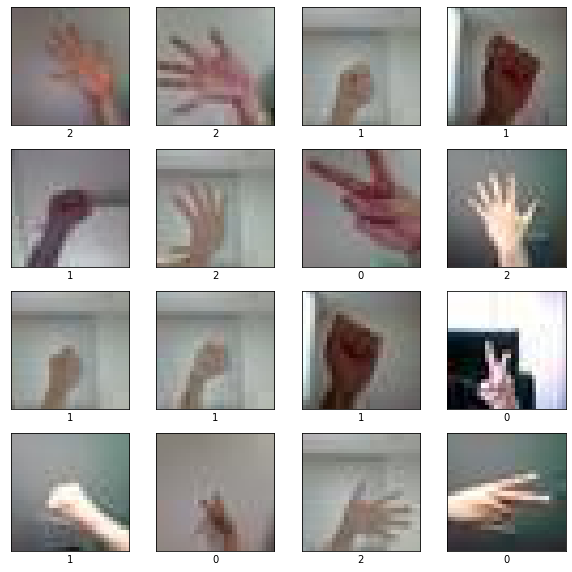

In [31]:
# Image labeling check 

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x1_train[i], cmap=plt.cm.binary)
    plt.xlabel(y1_train[i])
plt.show()

In [32]:
c1 = 16
c2 = 32
n_dense = 128

In [34]:
# Modeling #1

model_1 = tf.keras.Sequential([
  layers.Conv2D(c1, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 3)),
  layers.MaxPooling2D(2, 2),
  layers.Conv2D(c2, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(n_dense, activation='relu'),
  layers.Dense(3, activation='softmax')  # 입력받은 값을 0-1 사이의 값으로 정규화
])

In [35]:
# Compiling _ Accuracy Purpose 

model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
model_1.fit(x1_train, y1_train, epochs=20)

Epoch 1/20
89/89 [==============================] - 3s 21ms/step - loss: 1.0131 - accuracy: 0.4826
Epoch 2/20
89/89 [==============================] - 2s 22ms/step - loss: 0.7298 - accuracy: 0.6702
Epoch 3/20
89/89 [==============================] - 2s 22ms/step - loss: 0.5834 - accuracy: 0.7567
Epoch 4/20
89/89 [==============================] - 2s 22ms/step - loss: 0.4847 - accuracy: 0.7816
Epoch 5/20
89/89 [==============================] - 2s 22ms/step - loss: 0.4095 - accuracy: 0.8266
Epoch 6/20
89/89 [==============================] - 2s 22ms/step - loss: 0.3458 - accuracy: 0.8461
Epoch 7/20
89/89 [==============================] - 2s 22ms/step - loss: 0.3222 - accuracy: 0.8631
Epoch 8/20
89/89 [==============================] - 2s 22ms/step - loss: 0.2659 - accuracy: 0.8830
Epoch 9/20
89/89 [==============================] - 2s 22ms/step - loss: 0.2353 - accuracy: 0.8968
Epoch 10/20
89/89 [==============================] - 2s 22ms/step - loss: 0.2214 - accuracy: 0.8968
Epoch 11/

In [37]:
# Test Result

test_loss, test_accuracy = model_1.evaluate(x1_test, y1_test)

23/23 [==============================] - 0s 9ms/step - loss: 0.1579 - accuracy: 0.9078


Model #1 Test Result

In [38]:
print('test loss: {}'.format(test_loss))
print('test accuracy: {}'.format(test_accuracy))

test loss: 0.1578543484210968
test accuracy: 0.9078013896942139


>> 조원들과 테스트 결과를 가지고 논의한 결과 하나의 데이터셋으로 train & test 데이터를 나눠 실행한 accuracy와 train & test 데이터를 아예 다른 데이터셋을 이용해 진행한 accuracy의 차이가 큰 것을 확인했다. 
그래서 위와같은 결과를 하나 도출한 후 Individual Train DataSet, Test DataSet을 이용해 다시 한번 진행했다.

## Using Individual Train & Test Dataset

Training Data Normalization 

In [39]:
(x_train, y_train) = load_data(train_img_path, 3525)  
x_train_norm = x_train / 255.0  # 입력은 0~1 사이의 값으로 정규화


학습데이터(x_train)의 이미지 개수는 3525 입니다.


>> For Optimizing Test Result Add RandomFlip

Model #2 | RandomFlip, RandomRotation = 0.2

In [40]:
data_augmentation_2 = tf.keras.Sequential([

    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [41]:
c1 = 16
c2 = 32
n_dense = 128

In [42]:
model_2 = tf.keras.Sequential([
  data_augmentation_2,
  layers.Conv2D(c1, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 3)),
  layers.MaxPooling2D(2, 2),
  layers.Conv2D(c2, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(n_dense, activation='relu'),
  layers.Dense(3, activation='softmax')  # 입력받은 값을 0-1 사이의 값으로 정규화
])

In [43]:
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
model_2.fit(x_train_norm, y_train, epochs=20, validation_split=0.25)

Epoch 1/20
83/83 [==============================] - 3s 29ms/step - loss: 1.0298 - accuracy: 0.4695 - val_loss: 1.7016 - val_accuracy: 0.0000e+00
Epoch 2/20
83/83 [==============================] - 2s 27ms/step - loss: 1.0023 - accuracy: 0.5093 - val_loss: 1.6513 - val_accuracy: 0.0000e+00
Epoch 3/20
83/83 [==============================] - 2s 27ms/step - loss: 0.9628 - accuracy: 0.5414 - val_loss: 1.5153 - val_accuracy: 0.0454
Epoch 4/20
83/83 [==============================] - 2s 27ms/step - loss: 0.9000 - accuracy: 0.5853 - val_loss: 1.8413 - val_accuracy: 0.0839
Epoch 5/20
83/83 [==============================] - 2s 28ms/step - loss: 0.8462 - accuracy: 0.6239 - val_loss: 2.0019 - val_accuracy: 0.0692
Epoch 6/20
83/83 [==============================] - 2s 28ms/step - loss: 0.8010 - accuracy: 0.6406 - val_loss: 1.1496 - val_accuracy: 0.3719
Epoch 7/20
83/83 [==============================] - 2s 28ms/step - loss: 0.7598 - accuracy: 0.6765 - val_loss: 1.6333 - val_accuracy: 0.2166
Epoch

Model #2 Train Result : loss: 0.2219 - accuracy: 0.9035 - val_loss: 0.8504 - val_accuracy: 0.7109

- loss : 훈련 손실값
- acc : 훈련 정확도
- val_loss : 검증 손실값
- val_acc : 검증 정확도


Model #3 | RandomFlip, RandomRotation = 0.5
>> Model #2보다 더 나은 accuracy 결과를 얻기 위해 진행

In [45]:
## Increase Rotation ratio

data_augmentation_3 = tf.keras.Sequential([

    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.5)
])

In [46]:
c3 = 32
c4 = 64
n_dense_1 = 256

In [47]:
model_3 = tf.keras.Sequential([
  data_augmentation_3,
  layers.Conv2D(c3, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 3)),
  layers.MaxPooling2D(2, 2),
  layers.Dropout(.5),
  layers.Conv2D(c4, (3, 3), activation='relu'),
  layers.Dropout(.5),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(n_dense_1, activation='relu'),
  layers.Dense(3, activation='softmax')  # 입력받은 값을 0-1 사이의 값으로 정규화
])

In [48]:
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
model_3.fit(x_train_norm, y_train, epochs=20, validation_split=0.5)

Epoch 1/20
56/56 [==============================] - 4s 58ms/step - loss: 0.7368 - accuracy: 0.5448 - val_loss: 2.5434 - val_accuracy: 0.1429
Epoch 2/20
56/56 [==============================] - 3s 54ms/step - loss: 0.6808 - accuracy: 0.5624 - val_loss: 3.7972 - val_accuracy: 0.0000e+00
Epoch 3/20
56/56 [==============================] - 3s 54ms/step - loss: 0.6831 - accuracy: 0.5823 - val_loss: 3.7355 - val_accuracy: 0.0993
Epoch 4/20
56/56 [==============================] - 3s 55ms/step - loss: 0.6731 - accuracy: 0.5743 - val_loss: 4.2441 - val_accuracy: 0.1435
Epoch 5/20
56/56 [==============================] - 3s 54ms/step - loss: 0.6596 - accuracy: 0.5993 - val_loss: 4.3483 - val_accuracy: 0.1214
Epoch 6/20
56/56 [==============================] - 3s 54ms/step - loss: 0.6478 - accuracy: 0.6243 - val_loss: 3.4181 - val_accuracy: 0.1679
Epoch 7/20
56/56 [==============================] - 3s 54ms/step - loss: 0.6443 - accuracy: 0.6198 - val_loss: 4.4877 - val_accuracy: 0.0862
Epoch 8/2

Model_1 Train Result : loss: 0.5611 - accuracy: 0.7624 - val_loss: 1.3630 - val_accuracy: 0.2506

#### Test Data Load | Individual Dataset

In [50]:
###Test data
# os.getcwd()
test_img_path = '/content/drive/MyDrive/Colab Notebooks/aiffel_lms/lms_rock/new_test'

test_img_path_r = glob(test_img_path + '/rock/*.jpg')
test_img_path_s = glob(test_img_path + '/scissor/*.jpg')
test_img_path_p = glob(test_img_path + '/paper/*.jpg')

In [51]:
count_image(test_img_path_r) 
count_image(test_img_path_p)
count_image(test_img_path_s) 


209 images are counted
209 images are counted
209 images are counted


In [52]:
print(209+209+209)
# 즉 전체 627개

627


In [53]:
# Bring Test Images
(x_test, y_test) = load_data(test_img_path, 627)


학습데이터(x_train)의 이미지 개수는 627 입니다.


In [54]:
# model accuracy check_using model
test_loss_t, test_accuracy_t = model_2.evaluate(x_test, y_test, verbose = 1)

20/20 [==============================] - 0s 9ms/step - loss: 497.7734 - accuracy: 0.3796


In [55]:
# model accuracy check_using model_1
test_loss_t, test_accuracy_t = model_3.evaluate(x_test, y_test, verbose = 1)

20/20 [==============================] - 0s 12ms/step - loss: 637.1075 - accuracy: 0.3668


# Conclusion
1. Train Data와 Test Data를 아예 다른 이미지로 트레이닝 & 테스트를 진행했을 시 2개의 모델 다 예측률이 낮게 나옴
2. Train 이미지에 비슷한 이미지가 많아서 이런 결과가 나왔을 수 있겠지만 추가적인 공부를 통해 문제를 해결해보고 싶음 
3. 추후 Model을 체계적으로 설계해보고자 함 